# Signals and Systems for Dummies, Chapter 14

In [1]:
from pathlib import Path
import sys

if (root := str(Path().resolve().parent.parent / "python")) not in sys.path:
    sys.path.append(root)
print(*sys.path, sep="\n")

import numpy as np
from scipy import signal, fft
import matplotlib.pyplot as plt
from matplotlib import rcParams
import math
from rfdsppy import continuous_time as conttime, plotting, discrete_time, tonegen
# import mplcursors

from importlib import reload

reload(conttime)
reload(plotting)
reload(discrete_time)
reload(tonegen)

# %matplotlib ipympl
%matplotlib inline

/usr/lib/python312.zip
/usr/lib/python3.12
/usr/lib/python3.12/lib-dynload

/home/ryanwtsai/repos/rfdsp_sim/python/venv/lib/python3.12/site-packages
/home/ryanwtsai/repos/rfdsp_sim/python


Text(0.5, 1.0, '0.8^n * (u(n) - u(n-16))')

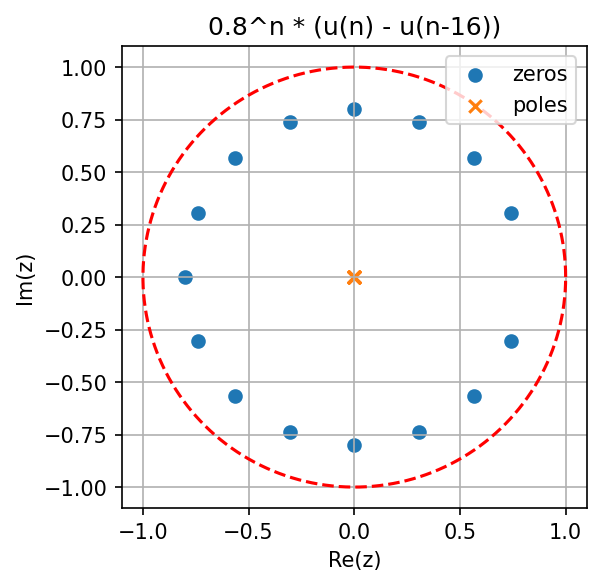

In [38]:
N = 16
a = 0.8

bk = a**np.arange(N)
ak = 1

z, p, k = signal.tf2zpk(bk, ak)

if len(z) > len(p):
    p = np.concatenate((p, np.zeros(len(z)-len(p))))
elif len(p) > len(z):
    z = np.concatenate((z, np.zeros(len(p)-len(z))))

w = np.linspace(0, 2*np.pi, 4096)
unit_circle = np.exp(1j*w)

fig, axs = plt.subplots(dpi=150, figsize=(4, 4))
axs.scatter(z.real, z.imag, marker='o', label="zeros")
axs.scatter(p.real, p.imag, marker='x', label="poles")
axs.plot(unit_circle.real, unit_circle.imag, 'r--')
axs.set_xlim(left=-1.1, right=1.1)
axs.set_ylim(bottom=-1.1, top=1.1)
axs.set_xlabel("Re(z)")
axs.set_ylabel("Im(z)")
axs.grid()
axs.legend(loc="upper right")
axs.set_title("0.8^n * (u(n) - u(n-16))")

Text(0.5, 1.0, 'delta(n) - 3/2*delta(n-1) - delta(n-2)')

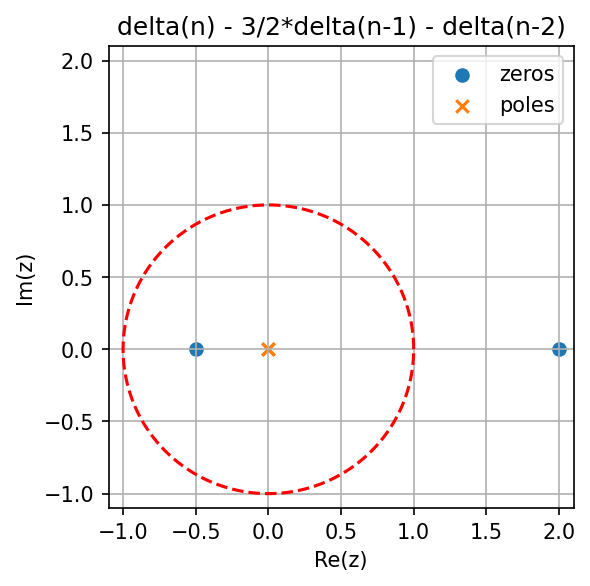

In [39]:
bk = [1, -3/2, -1]
ak = 1

z, p, k = signal.tf2zpk(bk, ak)

if len(z) > len(p):
    p = np.concatenate((p, np.zeros(len(z)-len(p))))
elif len(p) > len(z):
    z = np.concatenate((z, np.zeros(len(p)-len(z))))

w = np.linspace(0, 2*np.pi, 4096)
unit_circle = np.exp(1j*w)

fig, axs = plt.subplots(dpi=150, figsize=(4, 4))
axs.scatter(z.real, z.imag, marker='o', label="zeros")
axs.scatter(p.real, p.imag, marker='x', label="poles")
axs.plot(unit_circle.real, unit_circle.imag, 'r--')
axs.set_xlim(left=-1.1, right=2.1)
axs.set_ylim(bottom=-1.1, top=2.1)
axs.set_xlabel("Re(z)")
axs.set_ylabel("Im(z)")
axs.grid()
axs.legend(loc="upper right")
axs.set_title("delta(n) - 3/2*delta(n-1) - delta(n-2)")